## **Data Preprocessing**

### **Exploring the Data**

In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
import pandas as pd

In [109]:
df=pd.read_excel('/content/drive/MyDrive/Data_Combined.xlsx')

In [110]:
df.head()

,Unnamed: 0,Patient_Number,Glucose_Level,Cholestrol,Temp,Weight,BMI,Height,Waist_circumference,HB,...,Symp_Headache_i,breathlessness_i,taste_Smell_i,Close_to_Someonewith_Covid_i,break_through,sample_id,APOE2,APOE4,raw_APOE2,raw_APOE4
0,0,1,4,6,36,63,23,2,85,16,...,N,N,NaN,N,N,1,0,0,CC,TT
1,1,2,5,6,36,67,24,2,80,16,...,N,N,N,N,N,2,0,0,CC,TT
2,2,8,5,6,36,95,33,2,112,13,...,N,N,N,N,N,8,0,0,CC,TT
3,3,9,4,6,36,54,22,2,68,9,...,N,N,N,N,N,9,1,0,CT,TT
4,4,11,3,7,37,88,33,2,96,14,...,N,N,N,N,N,11,0,0,CC,TT


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    258 non-null    int64 
 1   Patient_Number                258 non-null    int64 
 2   Glucose_Level                 258 non-null    int64 
 3   Cholestrol                    258 non-null    int64 
 4   Temp                          258 non-null    int64 
 5   Weight                        258 non-null    int64 
 6   BMI                           258 non-null    int64 
 7   Height                        258 non-null    int64 
 8   Waist_circumference           258 non-null    int64 
 9   HB                            258 non-null    int64 
 10  Gender_x                      258 non-null    int64 
 11  Age                           258 non-null    int64 
 12  HLE                           258 non-null    int64 
 13  Smoking             

### **Filtering for J&J or Pfizer Only**

In [112]:
# Filter the DataFrame to show only participants vaccinated with either Pfizer or J&J
filtered_df = df[df['Vaccine_Type'].isin(['Pfizer', 'J&J'])]

In [113]:
df = filtered_df

In [114]:
df.head()

,Unnamed: 0,Patient_Number,Glucose_Level,Cholestrol,Temp,Weight,BMI,Height,Waist_circumference,HB,...,Symp_Headache_i,breathlessness_i,taste_Smell_i,Close_to_Someonewith_Covid_i,break_through,sample_id,APOE2,APOE4,raw_APOE2,raw_APOE4
0,0,1,4,6,36,63,23,2,85,16,...,N,N,NaN,N,N,1,0,0,CC,TT
1,1,2,5,6,36,67,24,2,80,16,...,N,N,N,N,N,2,0,0,CC,TT
2,2,8,5,6,36,95,33,2,112,13,...,N,N,N,N,N,8,0,0,CC,TT
3,3,9,4,6,36,54,22,2,68,9,...,N,N,N,N,N,9,1,0,CT,TT
4,4,11,3,7,37,88,33,2,96,14,...,N,N,N,N,N,11,0,0,CC,TT


In [115]:
df['Vaccine_Type'].value_counts()

Vaccine_Type
Pfizer    115
J&J        41
Name: count, dtype: int64

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 0 to 256
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    156 non-null    int64 
 1   Patient_Number                156 non-null    int64 
 2   Glucose_Level                 156 non-null    int64 
 3   Cholestrol                    156 non-null    int64 
 4   Temp                          156 non-null    int64 
 5   Weight                        156 non-null    int64 
 6   BMI                           156 non-null    int64 
 7   Height                        156 non-null    int64 
 8   Waist_circumference           156 non-null    int64 
 9   HB                            156 non-null    int64 
 10  Gender_x                      156 non-null    int64 
 11  Age                           156 non-null    int64 
 12  HLE                           156 non-null    int64 
 13  Smoking                  

### **Checking for nas**

In [117]:
#checkking for nas
def check_nas(df):
    for column in df.columns:
        na_count = df[column].isna().sum()
        if na_count > 0:
            print(f"{column} has {na_count} missing values.")

In [118]:
check_nas(df)

Symptoms_and_Treatment has 1 missing values.
Hospitalization has 2 missing values.
Co-Morbidities has 1 missing values.
Symp_Cold has 33 missing values.
Symp_Cough has 36 missing values.
Symp_Sore_throat has 33 missing values.
Symp_Headache has 33 missing values.
breathlessness has 33 missing values.
taste_Smell has 34 missing values.
Close_to_Someonewith_Covid has 33 missing values.
COVID-19_comorbidities has 34 missing values.
Symp_Cold_i has 5 missing values.
Symp_Cough_i has 6 missing values.
Symp_Sore_throat_i has 5 missing values.
Symp_Headache_i has 6 missing values.
breathlessness_i has 7 missing values.
taste_Smell_i has 6 missing values.
Close_to_Someonewith_Covid_i has 5 missing values.


In [119]:
#checkking if nas are more than 30% of the data, and dropping them
def drop_nas(df):
  for column in df.columns:
          na_count = df[column].isna().sum()
          if na_count > (len(df) * 0.3): #dropping if the na_count is more than 30%
              df.drop(column, axis=1, inplace=True)

In [120]:
#nothing dropped
drop_nas(df)

### **Dropping Unneccessary Columns**

In [121]:
df = df.drop(['Unnamed: 0', 'Participant_Number', 'Patient_Number', 'sample_id', 'APOE4', 'APOE2'], axis=1)

### **Imputing Missing Data**

In [122]:
from sklearn.impute import SimpleImputer
import pandas as pd

def impute_df(df):
  # Splitting numeric and non-numeric data
  numeric_cols = df.select_dtypes(include=['number']).columns
  nonnumeric_cols = df.select_dtypes(exclude=['number']).columns

  # Impute na's that are numeric
  imputer = SimpleImputer(strategy="mean")
  imputed_numeric = pd.DataFrame(imputer.fit_transform(df[numeric_cols]), columns=numeric_cols)

  # Impute na's that are non-numeric
  imputer_str = SimpleImputer(strategy="most_frequent")
  imputed_nonnumeric = pd.DataFrame(imputer_str.fit_transform(df[nonnumeric_cols]), columns=nonnumeric_cols)

  # Concatenate the imputed numeric and nonnumeric
  imputed_df = pd.concat([imputed_numeric, imputed_nonnumeric], axis=1)
  return imputed_df

In [123]:
df = impute_df(df)

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Glucose_Level                 156 non-null    float64
 1   Cholestrol                    156 non-null    float64
 2   Temp                          156 non-null    float64
 3   Weight                        156 non-null    float64
 4   BMI                           156 non-null    float64
 5   Height                        156 non-null    float64
 6   Waist_circumference           156 non-null    float64
 7   HB                            156 non-null    float64
 8   Gender_x                      156 non-null    float64
 9   Age                           156 non-null    float64
 10  HLE                           156 non-null    float64
 11  Smoking                       156 non-null    float64
 12  Physical_activity             156 non-null    float64
 13  PA/we

### **Encoding the categorical columns**

In [125]:
#making a deep copy for later use
original_df = df.copy()

In [126]:
categorical_columns = df.select_dtypes(include=['object']).columns

In [127]:
categorical_columns

Index(['Vaccine_Type', 'Vaccination_Status', 'Number_of_Doses',
       'Boosting_Status', 'Side_Effects', 'Symptoms_and_Treatment',
       'Hospitalization', 'Co-Morbidities', 'BP_Average', 'Weight_Category',
       'Occupation', 'Marital_status', 'Hazardous exposure', 'Alcohol',
       'Symp_Cold', 'Symp_Cough', 'Symp_Sore_throat', 'Symp_Headache',
       'breathlessness', 'taste_Smell', 'Close_to_Someonewith_Covid',
       'COVID-19_comorbidities', 'Symp_Cold_i', 'Symp_Cough_i',
       'Symp_Sore_throat_i', 'Symp_Headache_i', 'breathlessness_i',
       'taste_Smell_i', 'Close_to_Someonewith_Covid_i', 'break_through',
       'raw_APOE2', 'raw_APOE4'],
      dtype='object')

In [128]:
def encode_categorical_columns(df):
  from sklearn.preprocessing import LabelEncoder
  # Initialize LabelEncoder
  label_encoder = LabelEncoder()

  # Convert all values in object columns to strings and encode
  for column in df.columns:
      if df[column].dtype == 'object':
          df[column] = df[column].astype(str)
          df[column] = label_encoder.fit_transform(df[column])

  return df

In [129]:
df = encode_categorical_columns(df)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Glucose_Level                 156 non-null    float64
 1   Cholestrol                    156 non-null    float64
 2   Temp                          156 non-null    float64
 3   Weight                        156 non-null    float64
 4   BMI                           156 non-null    float64
 5   Height                        156 non-null    float64
 6   Waist_circumference           156 non-null    float64
 7   HB                            156 non-null    float64
 8   Gender_x                      156 non-null    float64
 9   Age                           156 non-null    float64
 10  HLE                           156 non-null    float64
 11  Smoking                       156 non-null    float64
 12  Physical_activity             156 non-null    float64
 13  PA/we

In [131]:
df['Vaccine_Type'].value_counts()

Vaccine_Type
1    115
0     41
Name: count, dtype: int64

## **Feature Engineering**

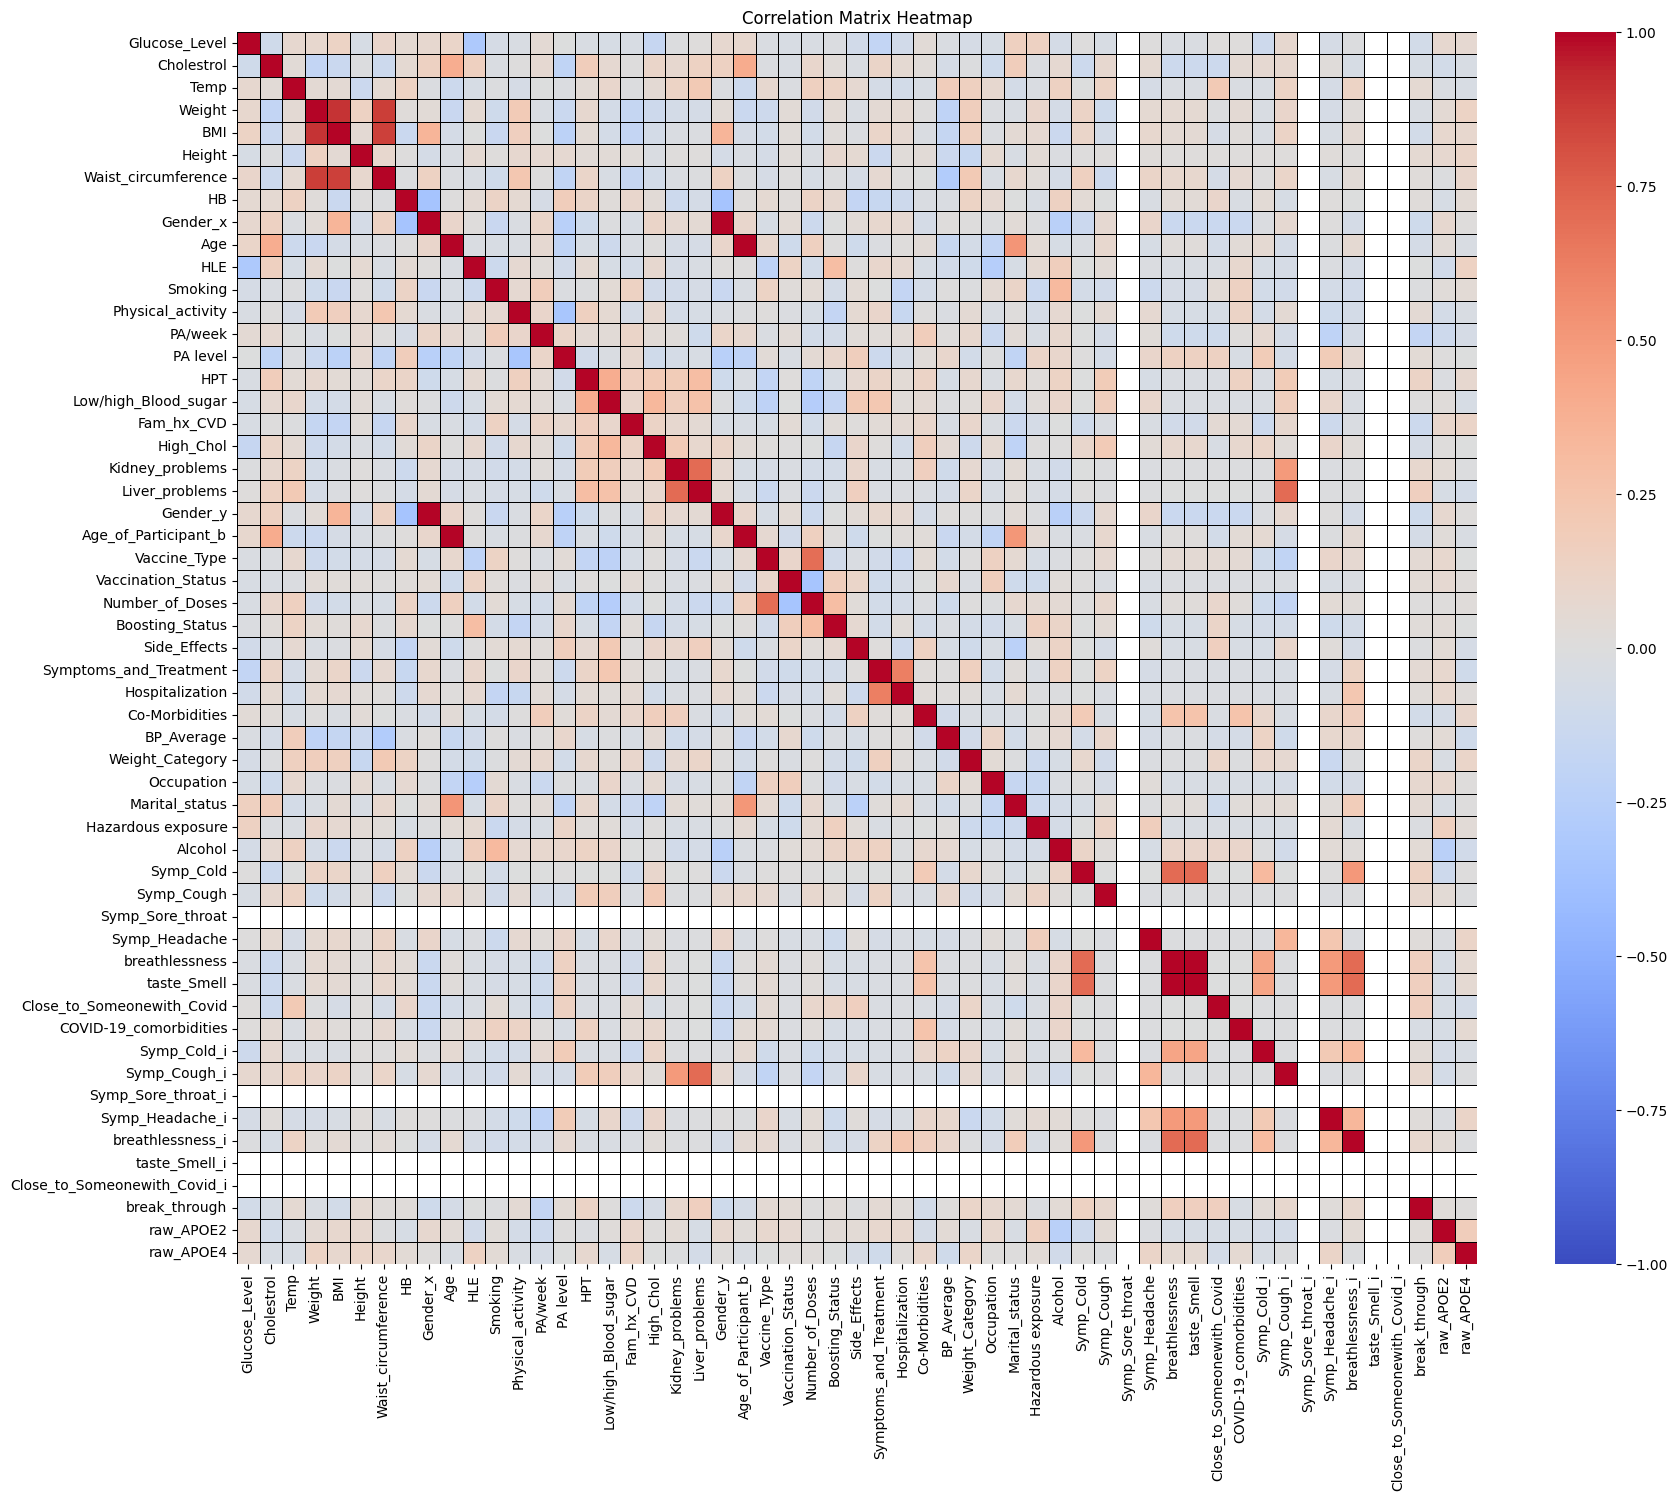

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Calculate the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 16))

# Create a heatmap
sns.heatmap(corr_matrix, annot=False, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, linecolor='black')

# Customize the plot (optional)
plt.title('Correlation Matrix Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Display the plot
plt.show()


In [133]:
import pandas as pd
import numpy as np

# 1. BMI and Age interaction
df['BMI_Age_Interaction'] = df['BMI'] * df['Age']

# 2. Waist-to-Height ratio
df['Waist_to_Height_Interaction'] = df['Waist_circumference'] * df['Height']

# 3. Glucose-Cholesterol ratio
df['Glucose_Cholesterol_Interaction'] = df['Glucose_Level'] * df['Cholestrol']

# 4. Temperature deviation from normal (assuming 37°C is normal)
df['Temp_Deviation'] = df['Temp'] - 37

# 5. Waist-to-BMI Interactio
df['Waist_BMI_Interaction'] = df['Waist_circumference'] * df['BMI']

print("New features added to the dataframe:")
print(df.columns[-5:])  # Print the last 15 column names (assuming these are the new ones)

New features added to the dataframe:
Index(['BMI_Age_Interaction', 'Waist_to_Height_Interaction',
       'Glucose_Cholesterol_Interaction', 'Temp_Deviation',
       'Waist_BMI_Interaction'],
      dtype='object')


## **K-Means Clustering**

### **Determining the Number of Clusters: Elbow Method**

In [134]:
!pip install kneed
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator

In [135]:
# Apply the elbow method to determine the optimal number of clusters
sse = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, init="k-means++", max_iter=500)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

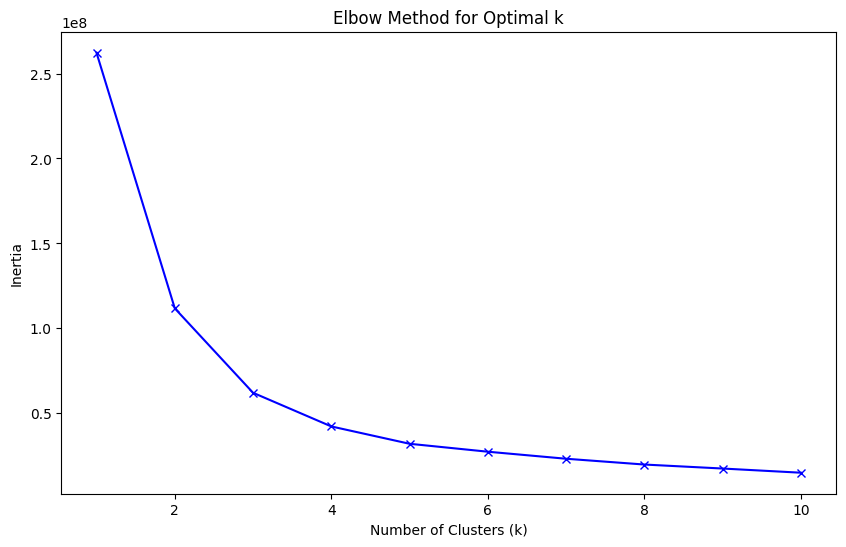

In [136]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, sse, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [137]:
# Determine the optimal number of clusters using KneeLocator
k1 = KneeLocator(K, sse, curve='convex', direction='decreasing')
optimal_k = k1.elbow
print(f'The optimal number of clusters is: {optimal_k}')
optimal_k = 3

The optimal number of clusters is: 3


### **K-Means Clustering**

In [138]:
# Fit the K-Means model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, init="k-means++", max_iter=500)
df['Cluster'] = kmeans.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [139]:
df['Cluster']

0      1
1      1
2      2
3      1
4      2
      ..
151    2
152    2
153    2
154    1
155    1
Name: Cluster, Length: 156, dtype: int32

## **Evaluation of K-Means Clustering**

In [140]:
from sklearn.cluster import KMeans
import pandas as pd

# Assuming df is your DataFrame and 'Cluster' is the column with cluster labels
features = ['Glucose_Level', 'Cholestrol', 'Temp', 'Weight', 'BMI', 'Height',
            'Waist_circumference', 'HB', 'Gender_x', 'Age', 'HLE', 'Smoking',
            'Physical_activity', 'PA/week', 'PA level', 'HPT',
            'Low/high_Blood_sugar', 'Fam_hx_CVD', 'High_Chol', 'Kidney_problems',
            'Liver_problems', 'Gender_y', 'Age_of_Participant_b', 'Vaccine_Type',
            'Vaccination_Status', 'Number_of_Doses', 'Boosting_Status',
            'Side_Effects', 'Symptoms_and_Treatment', 'Hospitalization',
            'Co-Morbidities', 'BP_Average', 'Weight_Category', 'Occupation',
            'Marital_status', 'Hazardous exposure', 'Alcohol', 'Symp_Cold',
            'Symp_Cough', 'Symp_Sore_throat', 'Symp_Headache', 'breathlessness',
            'taste_Smell', 'Close_to_Someonewith_Covid', 'COVID-19_comorbidities',
            'Symp_Cold_i', 'Symp_Cough_i', 'Symp_Sore_throat_i', 'Symp_Headache_i',
            'breathlessness_i', 'taste_Smell_i', 'Close_to_Someonewith_Covid_i',
            'break_through', 'raw_APOE2', 'raw_APOE4', 'BMI_Age_Interaction', 'Waist_to_Height_Interaction',
            'Glucose_Cholesterol_Interaction', 'Temp_Deviation', 'Waist_BMI_Interaction']

labels = kmeans.fit_predict(df[features])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [141]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

# Calculate silhouette score
silhouette_avg = silhouette_score(df[features], labels)
print(f'Silhouette Score: {silhouette_avg}')

# Calculate Calinski-Harabasz score
ch_score = calinski_harabasz_score(df[features], labels)
print(f'Calinski-Harabasz Index: {ch_score}')

kmeans.fit(df[features])
total_wcss = kmeans.inertia_
print(f'WCSS Index: {total_wcss}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.47342884035603194
Calinski-Harabasz Index: 246.62385609496
WCSS Index: 62084961.34962717


## **Explanation of K-Means Clustering**

In [142]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install shap
import shap

In [143]:
# Split the data for training the Random Forest classifier
X = df.drop('Cluster', axis=1)
y = df['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Random Tree Classifier**

In [144]:
# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Calculate accuracy
accuracy = rf_classifier.score(X_test, y_test)
print(f"Random Forest Classifier Accuracy: {accuracy:.2f}")

Random Forest Classifier Accuracy: 0.94


### **SHAP**

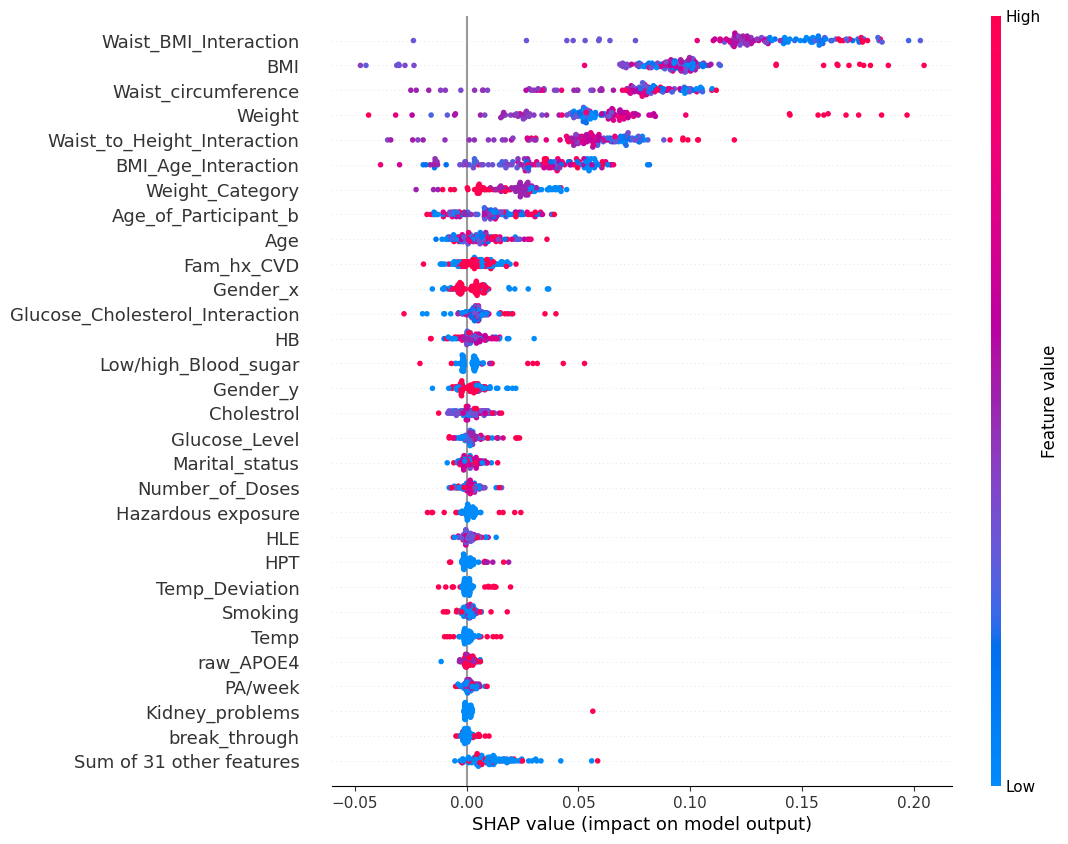

In [145]:
# Get model predictions
y_pred = rf_classifier.predict(X_train)

# Explain the model using SHAP
explainer = shap.TreeExplainer(rf_classifier)

# Get SHAP values for each predicted class
shap_values = explainer(X_train)

# Create a list to store the SHAP values for each sample
shap_values_final = []

# Append SHAP values at the corresponding index
for i, pred in enumerate(y_pred):
    shap_values_final.append(shap_values.values[i][:,pred])

# Convert to numpy array
shap_values.values = np.array(shap_values_final)

# Plot SHAP summary plot using beeswarm
plt.figure(figsize=(12, 8))
shap.plots.beeswarm(shap_values, max_display=30, plot_size=(10,10))

In [146]:
# Print feature importance
feature_importance = np.abs(shap_values_final).mean(0)
feature_importance = pd.DataFrame(list(zip(X.columns, feature_importance)), columns=['Feature', 'Importance'])
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("\nTop 10 important features:")
print(feature_importance.head(10))


Top 10 important features:
                        Feature  Importance
59        Waist_BMI_Interaction    0.136117
4                           BMI    0.095108
6           Waist_circumference    0.072382
3                        Weight    0.058397
56  Waist_to_Height_Interaction    0.056569
55          BMI_Age_Interaction    0.034547
32              Weight_Category    0.022153
22         Age_of_Participant_b    0.013989
9                           Age    0.008174
17                   Fam_hx_CVD    0.006859


In [147]:
# Explain the model using SHAP
explainer = shap.TreeExplainer(rf_classifier)
shap_values = explainer.shap_values(X_test)

np.shape(shap_values)

(32, 60, 3)

In [148]:
# Get feature importance for each cluster
for i in range(optimal_k):
    cluster_importance = np.abs(shap_values[i]).mean(0)
    feature_importance = pd.DataFrame(list(zip(X.columns, cluster_importance)), columns=['Feature', 'Importance'])
    feature_importance = feature_importance.sort_values('Importance', ascending=False)
    print(f"\nTop 5 important features for Cluster {i}:")
    print(feature_importance.head(5))


Top 5 important features for Cluster 0:
         Feature  Importance
1     Cholestrol    0.009666
2           Temp    0.009057
0  Glucose_Level    0.002050

Top 5 important features for Cluster 1:
         Feature  Importance
1     Cholestrol    0.010021
2           Temp    0.008581
0  Glucose_Level    0.001883

Top 5 important features for Cluster 2:
         Feature  Importance
1     Cholestrol    0.007714
2           Temp    0.006424
0  Glucose_Level    0.001894


## **Converting Data into Original Format**

In [149]:
#we have to drop all the changes we made
df.drop(['Cluster', 'BMI_Age_Interaction', 'Waist_to_Height_Interaction',
       'Glucose_Cholesterol_Interaction', 'Temp_Deviation',
       'Waist_BMI_Interaction'], axis=1, inplace=True)

In [150]:
def check_mixed_types(df):
    mixed_type_columns = []
    for column in df.columns:
        if df[column].dtype == 'object':
            types = set(df[column].apply(type))
            if len(types) > 1:
                mixed_type_columns.append((column, types))
    return mixed_type_columns

def convert_columns_to_string(df, columns):
    for column in columns:
        df[column] = df[column].astype(str)
    print("Columns converted to string type.")
    return df

def decode_columns(encoded_df, original_df):
    from sklearn.preprocessing import LabelEncoder

    # Check for mixed types in the original dataframe
    mixed_type_columns = check_mixed_types(original_df)

    # Convert columns with mixed types to string in the original dataframe
    columns_to_convert = [column for column, types in mixed_type_columns]
    original_df = convert_columns_to_string(original_df, columns_to_convert)

    # Now decode the encoded dataframe
    decoded_df = encoded_df.copy()

    for column in encoded_df.columns:
        if original_df[column].dtype == 'object':  # Check if the column was originally categorical
            le = LabelEncoder()
            le.fit(original_df[column])
            decoded_df[column] = le.inverse_transform(encoded_df[column])

    return decoded_df

In [151]:
decoded_df = decode_columns(df, original_df)

Columns converted to string type.


In [152]:
decoded_df.head()

,Glucose_Level,Cholestrol,Temp,Weight,BMI,Height,Waist_circumference,HB,Gender_x,Age,...,Symp_Cold_i,Symp_Cough_i,Symp_Sore_throat_i,Symp_Headache_i,breathlessness_i,taste_Smell_i,Close_to_Someonewith_Covid_i,break_through,raw_APOE2,raw_APOE4
0,4.0,6.0,36.0,63.0,23.0,2.0,85.0,16.0,2.0,57.0,...,N,N,N,N,N,N,N,N,CC,TT
1,5.0,6.0,36.0,67.0,24.0,2.0,80.0,16.0,2.0,55.0,...,N,N,N,N,N,N,N,N,CC,TT
2,5.0,6.0,36.0,95.0,33.0,2.0,112.0,13.0,1.0,51.0,...,N,N,N,N,N,N,N,N,CC,TT
3,4.0,6.0,36.0,54.0,22.0,2.0,68.0,9.0,2.0,56.0,...,N,N,N,N,N,N,N,N,CT,TT
4,3.0,7.0,37.0,88.0,33.0,2.0,96.0,14.0,2.0,30.0,...,N,N,N,N,N,N,N,N,CC,TT


## **Visualisations**

In [153]:
#Plot a stacked bar chart of category counts across clusters for a specified column
def plot_cluster_counts(df, column_name):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from tabulate import tabulate

    # Count occurences of category in each cluster
    cluster_counts = df.groupby([column_name, 'Cluster']).size().unstack(fill_value=0)

    # Plot stacked bar chart
    cluster_counts.plot(kind='bar', stacked=True, figsize=(10, 7))

    plt.title(f'Categories and their counts for {column_name}')
    plt.xlabel(column_name + " Categories")
    plt.ylabel('Frequency of Existence in Clusters')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

### **Distribution of Vaccines in each cluster**

In [154]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from tabulate import tabulate

# Add cluster labels to your dataframe
decoded_df['Cluster'] = labels

# Create a contingency table
contingency_table = pd.crosstab(decoded_df['Vaccine_Type'], decoded_df['Cluster'])

# Rename the columns to "Cluster 0", "Cluster 1", etc.
contingency_table.columns = [f'Cluster {i}' for i in range(len(contingency_table.columns))]

# Display the table
print(tabulate(contingency_table, headers='keys', tablefmt='pretty'))

+--------------+-----------+-----------+-----------+
| Vaccine_Type | Cluster 0 | Cluster 1 | Cluster 2 |
+--------------+-----------+-----------+-----------+
|     J&J      |     5     |    17     |    19     |
|    Pfizer    |    12     |    54     |    49     |
+--------------+-----------+-----------+-----------+


### **Clusters in relation to Breakthrough Infection**

In [155]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from tabulate import tabulate

# Create a function to get counts for each cluster
def get_cluster_counts(df, column, value):
    return df[df[column] == value]['Cluster'].value_counts().sort_index()

# Get counts for vaccination status
vaccinated_counts = get_cluster_counts(decoded_df, 'Vaccination_Status', 'complete')

# Get counts for breakthrough cases
breakthrough_yes = get_cluster_counts(decoded_df, 'break_through', 'Y')
breakthrough_no = get_cluster_counts(decoded_df, 'break_through', 'N')

# Create the final table
table_data = [
    ['Number of Vaccinated'] + vaccinated_counts.tolist(),
    ['Total BKI (Yes)'] + breakthrough_yes.tolist(),
    ['Total BKI (No)'] + breakthrough_no.tolist()
]

# Create column headers
num_clusters = len(np.unique(labels))
headers = ['Category'] + [f'Cluster {i}' for i in range(num_clusters)]

# Display the table
print(tabulate(table_data, headers=headers, tablefmt='pretty'))

+----------------------+-----------+-----------+-----------+
|       Category       | Cluster 0 | Cluster 1 | Cluster 2 |
+----------------------+-----------+-----------+-----------+
| Number of Vaccinated |    17     |    66     |    60     |
|   Total BKI (Yes)    |     1     |    15     |    16     |
|    Total BKI (No)    |    16     |    56     |    52     |
+----------------------+-----------+-----------+-----------+


### **Clusters in relation to Breakthrough Infection Percentages (%)**

In [156]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from tabulate import tabulate

# Create a function to get counts for each cluster
def get_cluster_counts(df, column, value):
    return df[df[column] == value]['Cluster'].value_counts().sort_index()

# Create a function to calculate BKI counts for each cluster
def get_bki_counts(df, vaccine_type):
    vaccine_df = df[(df['Vaccination_Status'] == 'complete') & (df['Vaccine_Type'] == vaccine_type)]
    return vaccine_df[vaccine_df['break_through'] == 'Y']['Cluster'].value_counts().sort_index()

# Get counts for Pfizer and J&J
pfizer_counts = get_cluster_counts(decoded_df[decoded_df['Vaccination_Status'] == 'complete'], 'Vaccine_Type', 'Pfizer')
jj_counts = get_cluster_counts(decoded_df[decoded_df['Vaccination_Status'] == 'complete'], 'Vaccine_Type', 'J&J')

# Get counts for breakthrough cases
breakthrough_yes = get_cluster_counts(decoded_df, 'break_through', 'Y')
breakthrough_no = get_cluster_counts(decoded_df, 'break_through', 'N')

# Calculate BKI counts for Pfizer and J&J
pfizer_bki_counts = get_bki_counts(decoded_df, 'Pfizer')
jj_bki_counts = get_bki_counts(decoded_df, 'J&J')

# Ensure all clusters are represented in the counts
all_clusters = range(len(np.unique(decoded_df['Cluster'])))
pfizer_bki_counts = pfizer_bki_counts.reindex(all_clusters, fill_value=0)
jj_bki_counts = jj_bki_counts.reindex(all_clusters, fill_value=0)

# Calculate BKI percentages based on total BKI count
total_bki = breakthrough_yes.sum()
pfizer_bki_percentages = (pfizer_bki_counts / total_bki * 100).round(2)
jj_bki_percentages = (jj_bki_counts / total_bki * 100).round(2)

# Create the final table
table_data = [
    ['Vaccinated (Pfizer)'] + pfizer_counts.tolist(),
    ['Vaccinated (J&J)'] + jj_counts.tolist(),
    ['Vaccine BKI (Pfizer) Count'] + pfizer_bki_counts.tolist(),
    ['Vaccine BKI (Pfizer) %'] + pfizer_bki_percentages.tolist(),
    ['Vaccine BKI (J&J) Count'] + jj_bki_counts.tolist(),
    ['Vaccine BKI (J&J) %'] + jj_bki_percentages.tolist()
]

# Create column headers
num_clusters = len(np.unique(decoded_df['Cluster']))
headers = ['Category'] + [f'Cluster {i}' for i in range(num_clusters)]

# Display the table
print(tabulate(table_data, headers=headers, tablefmt='pretty'))

+----------------------------+-----------+-----------+-----------+
|          Category          | Cluster 0 | Cluster 1 | Cluster 2 |
+----------------------------+-----------+-----------+-----------+
|    Vaccinated (Pfizer)     |    12     |    49     |    42     |
|      Vaccinated (J&J)      |     5     |    17     |    18     |
| Vaccine BKI (Pfizer) Count |     1     |    10     |    11     |
|   Vaccine BKI (Pfizer) %   |   3.12    |   31.25   |   34.38   |
|  Vaccine BKI (J&J) Count   |     0     |     4     |     3     |
|    Vaccine BKI (J&J) %     |    0.0    |   12.5    |   9.38    |
+----------------------------+-----------+-----------+-----------+


### **Mean Values of Most Important Features Across Clusters**

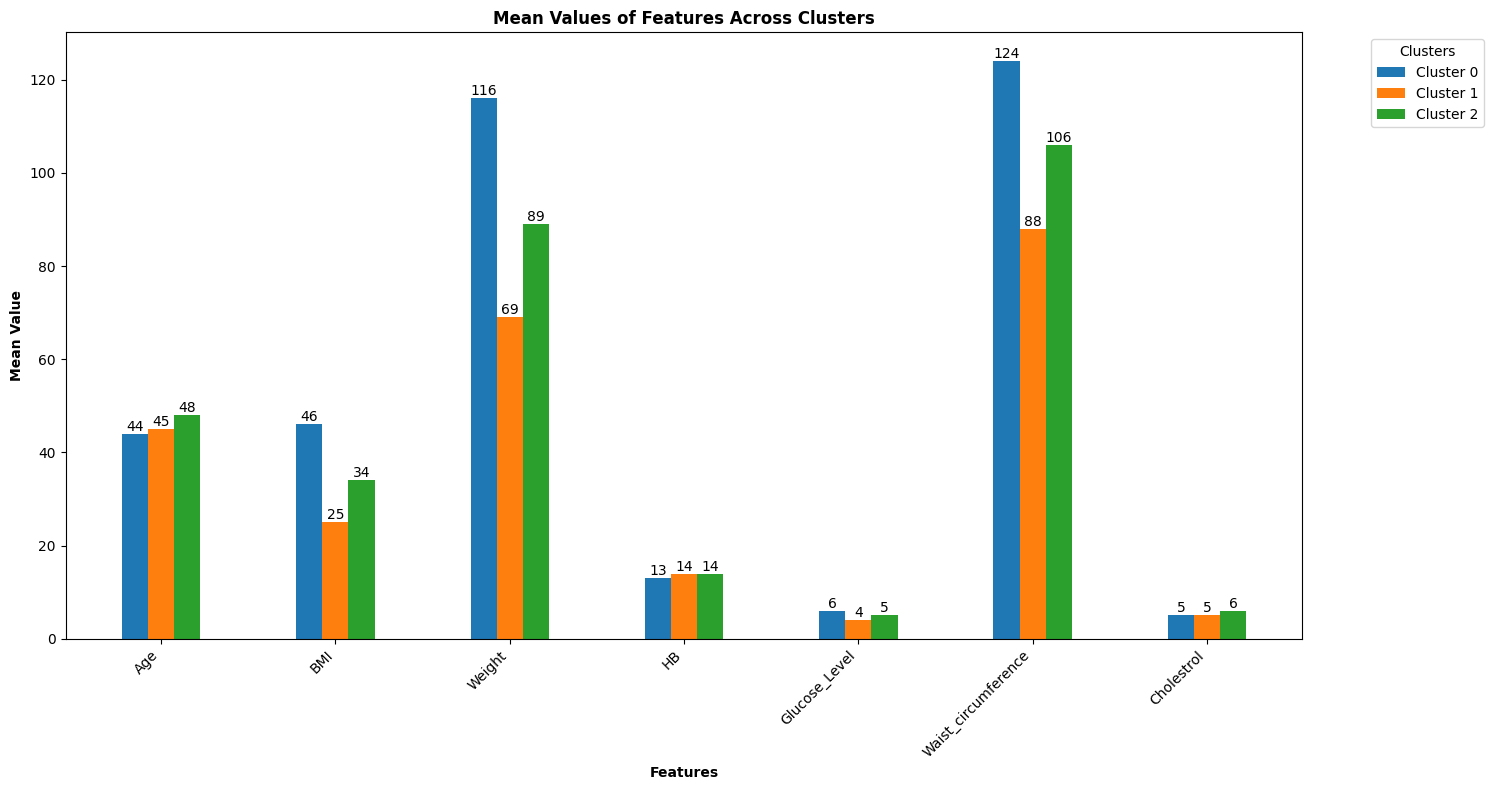

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming decoded_df is your original DataFrame with all the data

# List of features to visualize
features = ['Age', 'BMI', 'Weight', 'HB', 'Glucose_Level', 'Waist_circumference', 'Cholestrol']

# Calculate mean values for each feature in each cluster
cluster_means = decoded_df.groupby('Cluster')[features].mean().round(0)

# Transpose the DataFrame to have features as index
cluster_means = cluster_means.transpose()

# Create a figure
plt.figure(figsize=(15, 8))

# Set the width of each bar and the positions of the bars
bar_width = 0.15
r = np.arange(len(features))

# Create the grouped bar plot
for i, cluster in enumerate(cluster_means.columns):
    plt.bar(r + i*bar_width, cluster_means[cluster], width=bar_width, label=f'Cluster {cluster}')

# Customize the plot
plt.xlabel('Features', fontweight='bold')
plt.ylabel('Mean Value', fontweight='bold')
plt.title('Mean Values of Features Across Clusters', fontweight='bold')
plt.xticks(r + bar_width*(len(cluster_means.columns)-1)/2, features, rotation=45, ha='right')
plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')

for container in plt.gca().containers:
    plt.gca().bar_label(container)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### **Categories and their counts for BP_Average**

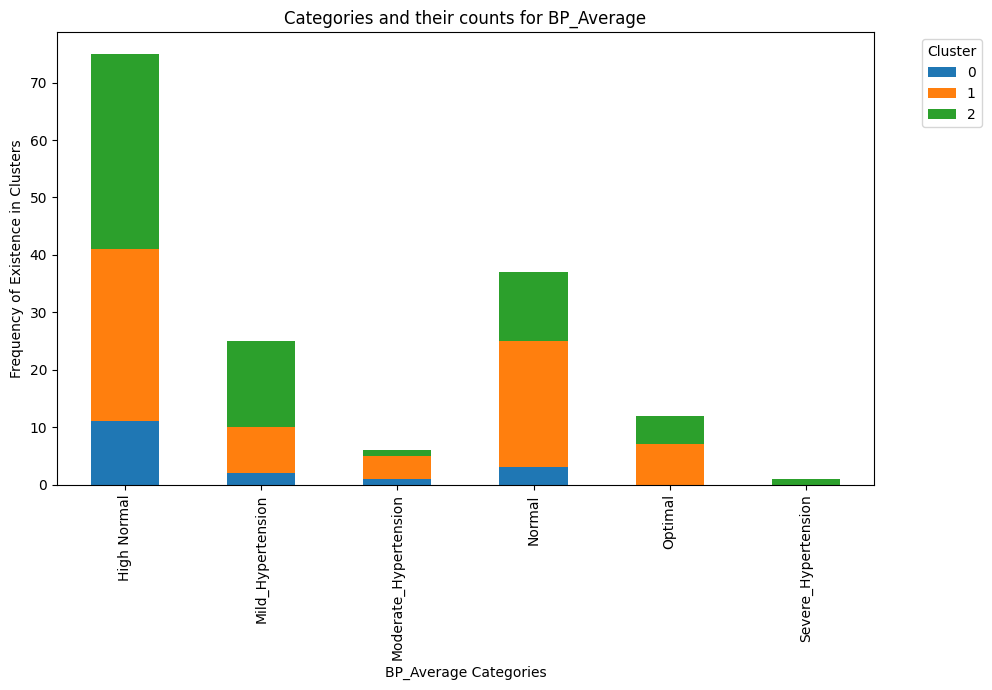

In [158]:
plot_cluster_counts(decoded_df, 'BP_Average')

### **Categories and their Vaccination Status Categories**

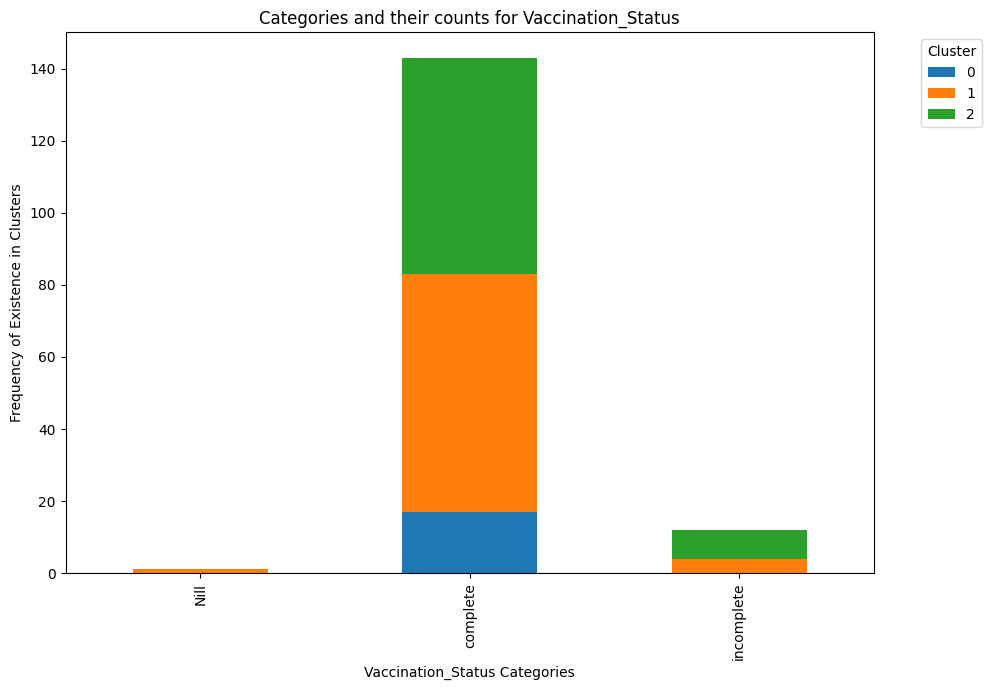

In [159]:
plot_cluster_counts(decoded_df, 'Vaccination_Status')

### **Categories and their counts for Alcohol Levels**

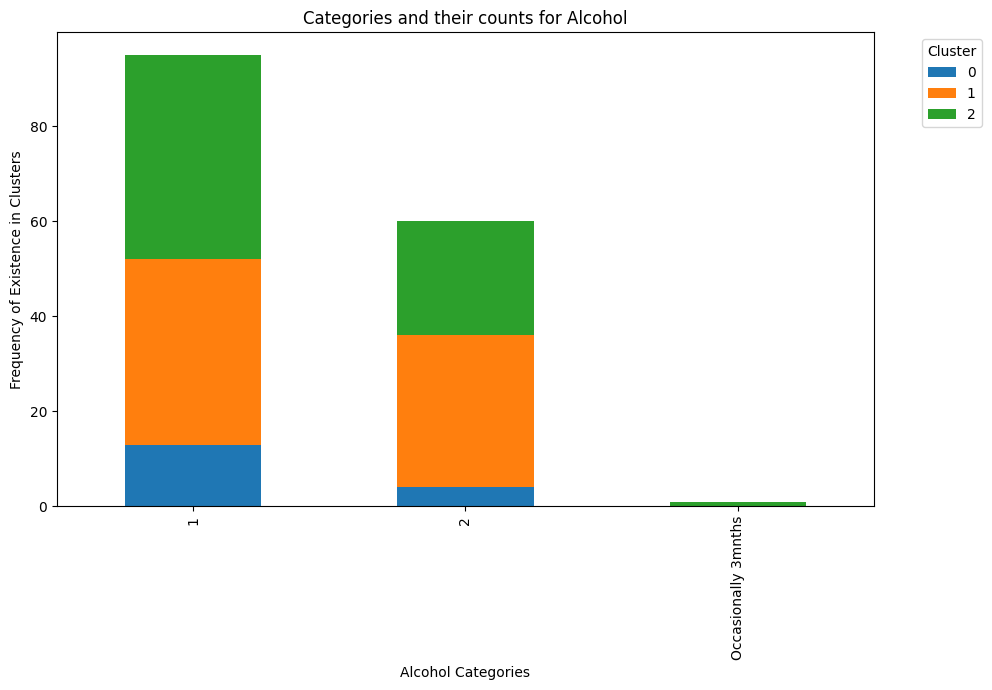

In [160]:
plot_cluster_counts(decoded_df, 'Alcohol')

###**Categories and their counts for raw_APOE2**

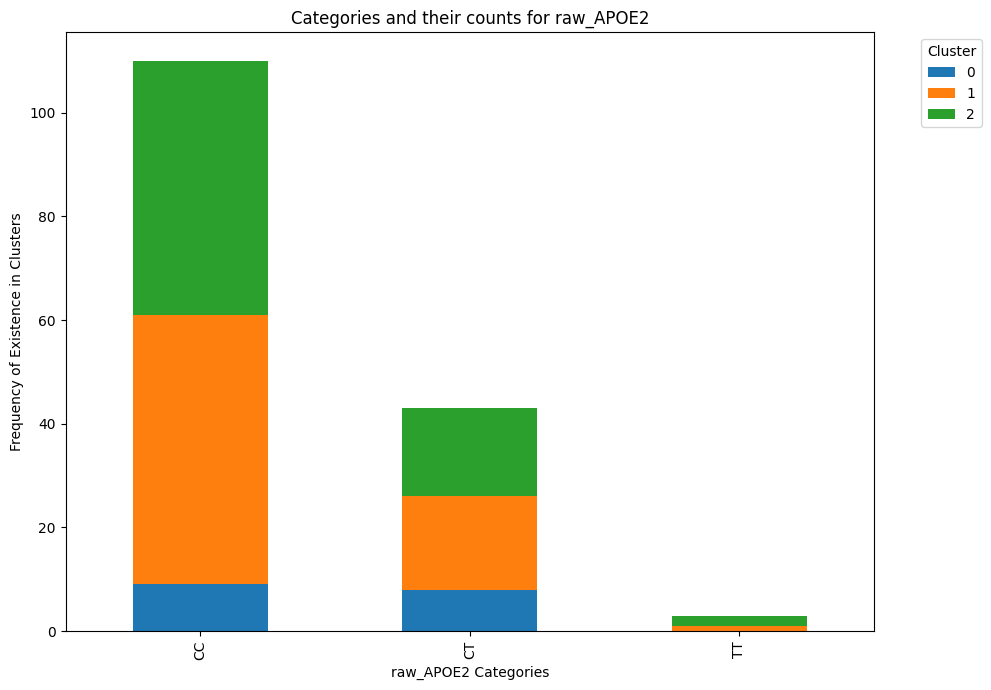

In [161]:
plot_cluster_counts(decoded_df, 'raw_APOE2')

### **Table Summary of raw categorical values and their distribution in each cluster**

In [162]:
def print_table(df, column_name):
    import pandas as pd
    import numpy as np
    from tabulate import tabulate

    # Get unique column name categories and clusters
    column_categories = sorted(df[column_name].unique())
    clusters = sorted(df['Cluster'].unique())

    # Create a function to get counts for each cluster
    def get_cluster_counts(df, column, value):
        counts = df[df[column] == value]['Cluster'].value_counts()
        return [counts.get(cluster, 0) for cluster in clusters]  # Use .get() with default 0

    # Create the table data
    table_data = []
    for column_category in column_categories:
        counts = get_cluster_counts(df, column_name, column_category)
        row = [column_category] + counts
        table_data.append(row)

    # Create column headers
    headers = [column_name + ' Category'] + [f'Cluster {i}' for i in clusters]

    # Display the table
    print(tabulate(table_data, headers=headers, tablefmt='pretty'))

In [163]:
print_table(decoded_df, 'BP_Average')

+-----------------------+-----------+-----------+-----------+
|  BP_Average Category  | Cluster 0 | Cluster 1 | Cluster 2 |
+-----------------------+-----------+-----------+-----------+
|      High Normal      |    11     |    30     |    34     |
|   Mild_Hypertension   |     2     |     8     |    15     |
| Moderate_Hypertension |     1     |     4     |     1     |
|        Normal         |     3     |    22     |    12     |
|        Optimal        |     0     |     7     |     5     |
|  Severe_Hypertension  |     0     |     0     |     1     |
+-----------------------+-----------+-----------+-----------+


In [164]:
print_table(decoded_df, 'Gender_x')

+-------------------+-----------+-----------+-----------+
| Gender_x Category | Cluster 0 | Cluster 1 | Cluster 2 |
+-------------------+-----------+-----------+-----------+
|        1.0        |     1     |    28     |    11     |
|        2.0        |    16     |    43     |    57     |
+-------------------+-----------+-----------+-----------+


In [165]:
print_table(decoded_df, 'Gender_y')

+-------------------+-----------+-----------+-----------+
| Gender_y Category | Cluster 0 | Cluster 1 | Cluster 2 |
+-------------------+-----------+-----------+-----------+
|        1.0        |     1     |    28     |    11     |
|        2.0        |    16     |    43     |    57     |
+-------------------+-----------+-----------+-----------+


In [166]:
print_table(decoded_df, 'Alcohol')

+---------------------+-----------+-----------+-----------+
|  Alcohol Category   | Cluster 0 | Cluster 1 | Cluster 2 |
+---------------------+-----------+-----------+-----------+
|          1          |    13     |    39     |    43     |
|          2          |     4     |    32     |    24     |
| Occasionally 3mnths |     0     |     0     |     1     |
+---------------------+-----------+-----------+-----------+


## **Observations on Profiles of People in Each Cluster and Their Relation to Breakthrough Infection**

**Cluster 0:**

---



1. Demographics:
   - Predominantly female (16 out of 17 are Gender 2.0)
   - Smallest cluster (17 people)

2. Blood Pressure:
   - Majority have High Normal BP (11 out of 17)
   - Very few with hypertension (2 mild, 1 moderate)

3. Alcohol Consumption:
   - Majority are regular drinkers (13 out of 17)

4. Vaccination:
   - 12 Pfizer, 5 J&J, Total = 17
   - Lowest vaccination rate among clusters

5. Breakthrough Infections:
   - Lowest BKI rate (5.88% overall)
   - 1 BKI with Pfizer (3.12% of Pfizer vaccinated)
   - 0 BKI with J&J

**Observations:** This cluster seems to be predominantly female with generally good blood pressure control. Despite having the highest proportion of regular alcohol drinkers, it has the lowest breakthrough infection rate. This could suggest that other factors (like age or overall health) might be more influential in this group's resistance to breakthrough infections.

**Cluster 1:**

---



1. Demographics:
   - More balanced gender distribution (43 Gender 2.0, 28 Gender 1.0)
   - Largest cluster (71 people)

2. Blood Pressure:
   - Diverse BP distribution
   - Highest number of people with Normal (22) and Optimal (7) BP

3. Alcohol Consumption:
   - Fairly even split between regular (39) and occasional (32) drinkers

4. Vaccination:
   - 49 Pfizer, 17 J&J, Total = 66
   - Highest number of vaccinated individuals

5. Breakthrough Infections:
   - Moderate BKI rate (22.73% overall)
   - 10 BKI with Pfizer (31.25% of Pfizer vaccinated)
   - 4 BKI with J&J (12.5% of J&J vaccinated)

**Observations:** This cluster is the most diverse in terms of gender and blood pressure categories. It also has the highest number of vaccinated individuals. The moderate BKI rate, despite having the best overall blood pressure profile, suggests that other factors might be influencing breakthrough infections in this group.

**Cluster 2:**

---



1. Demographics:
   - Predominantly female (57 Gender 2.0, 11 Gender 1.0)
   - 68 people total

2. Blood Pressure:
   - Highest proportion of High Normal (34) and Mild Hypertension (15)
   - Only cluster with a case of Severe Hypertension

3. Alcohol Consumption:
   - Majority are regular drinkers (43 out of 68)
   - Has the only "Occasionally 3mnths" drinker

4. Vaccination:
   - 42 Pfizer, 18 J&J, Total = 60

5. Breakthrough Infections:
   - Highest BKI rate (26.67% overall)
   - 11 BKI with Pfizer (34.38% of Pfizer vaccinated)
   - 3 BKI with J&J (9.38% of J&J vaccinated)

**Observations:** This cluster has the highest proportion of individuals with elevated blood pressure and the highest breakthrough infection rate. This could suggest a potential link between blood pressure control and susceptibility to breakthrough infections.

**Overall Observations:**

---



1. Gender: Clusters 0 and 2 are predominantly female, while Cluster 1 is more balanced. This doesn't seem to correlate directly with BKI rates.

2. Blood Pressure: There appears to be a potential correlation between blood pressure control and BKI rates. Cluster 2, with the highest proportion of elevated BP, also has the highest BKI rate.

3. Alcohol Consumption: No clear correlation between alcohol consumption patterns and BKI rates is apparent from this data.

4. Vaccine Efficacy: Across all clusters, Pfizer-vaccinated individuals show higher BKI rates compared to J&J-vaccinated individuals. This consistent pattern suggests a potential difference in vaccine efficacy that warrants further investigation.

5. Cluster Characteristics and BKI:
   - Cluster 0 (lowest BKI rate): Predominantly female, generally good BP control, highest proportion of regular drinkers.
   - Cluster 2 (highest BKI rate): Predominantly female, highest proportion of elevated BP, majority regular drinkers.

These observations suggest that blood pressure might be a significant factor in breakthrough infection risk. However, other variables (such as age, comorbidities, or time since vaccination) could also be playing crucial roles.

## **Conclusion**

### Key Findings

- Pfizer-vaccinated individuals show higher breakthrough infection (BKI) rates across all clusters compared to J&J-vaccinated individuals.
- Overall BKI rates: Cluster 2 (26.67%) > Cluster 1 (22.73%) > Cluster 0 (5.88%).
- Potential link between elevated blood pressure and higher BKI rates, particularly evident in Cluster 2.

### Implications for Medical Practitioners

#### Targeted Public Health Strategies
- The significant variance in BKI rates between different vaccine types and clusters suggests the need for tailored public health strategies. This includes possibly prioritizing booster doses for Pfizer recipients, especially in higher-risk clusters.

#### Vaccine Strategy
- Reassess vaccination strategies, potentially considering J&J for certain demographic groups.
- Investigate factors contributing to lower BKI rates in Cluster 0 for potential broader application.

#### Patient Education
- Emphasize the importance of blood pressure control in relation to vaccine efficacy and breakthrough infections.

### Benefits of AI in This Analysis

#### Pattern Recognition
- AI quickly identified complex relationships between multiple variables (e.g., BP, gender, alcohol consumption) and BKI rates.

#### Cluster Identification
- Machine learning algorithms effectively segmented the population into meaningful clusters, revealing group-specific risks.

#### Efficient Data Processing
- AI analyzed large datasets rapidly, allowing for timely insights and potential real-time monitoring of vaccination programs.

#### Hypothesis Generation
- AI-driven analysis suggested unexpected correlations (e.g., BP and BKI rates), prompting new avenues for research.



### Final Thoughts:

The application of AI in analyzing vaccination and breakthrough infection data provides critical insights that can significantly enhance public health strategies. By identifying the differences in vaccine efficacy across different clusters and understanding the factors contributing to higher BKI rates, medical practitioners can develop more effective, targeted interventions. This approach not only improves the management of current vaccination programs but also prepares us for future challenges in pandemic responses.